Deep learning on MNIST Dataset

Loading libraries

In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


Loading dataset into training set and testing set

In [2]:
from keras.datasets import mnist

data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

11501568/11490434 [==============================] - 0s 0us/step


Checking shape and size of dataset

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

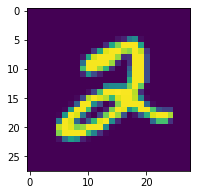

In [5]:
plt.figure(figsize=(25,3))
plt.imshow(train_images[5])

Normalizing values

In [6]:

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



CNN




In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Optimization with Adam optimizer

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1885 - accuracy: 0.9420
Epoch 2/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0529 - accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0242 - accuracy: 0.9921


Model evaluation

In [12]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0247 - accuracy: 0.9926


[0.024694932624697685, 0.9926000237464905]

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0111 - accuracy: 0.9968
Epoch 5/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0092 - accuracy: 0.9970


In [14]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.0300 - accuracy: 0.9929


[0.02999897487461567, 0.992900013923645]

Optimization with Nadam optimizer

In [15]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 2/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0093 - accuracy: 0.9966
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 4/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 5/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0070 - accuracy: 0.9978
